In [3]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  

df= pd.read_csv("Diwali Sales Data.csv", encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
#to check the data type and details 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [23]:
df = df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(11239, 13)

In [27]:
#changing the data type of Amount

df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [28]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [29]:
##Exploratory Data Analysis

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

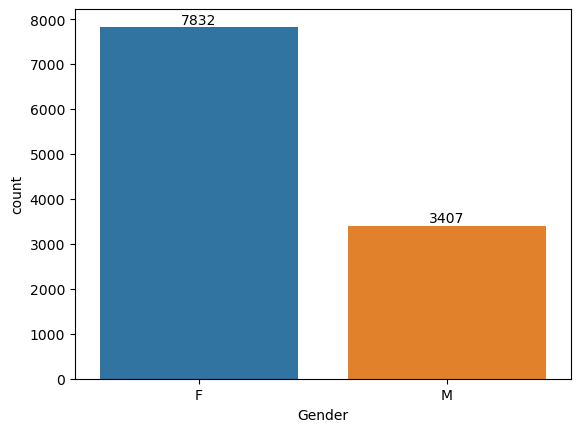

In [32]:
ax= sns.countplot(x= 'Gender', data = df)
# who is buying more male or female?
# conclusion: female buying more


for bars in ax.containers:
    ax.bar_label(bars)
    

In [34]:
df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)

,Gender,Amount
0,F,74335853
1,M,31913276


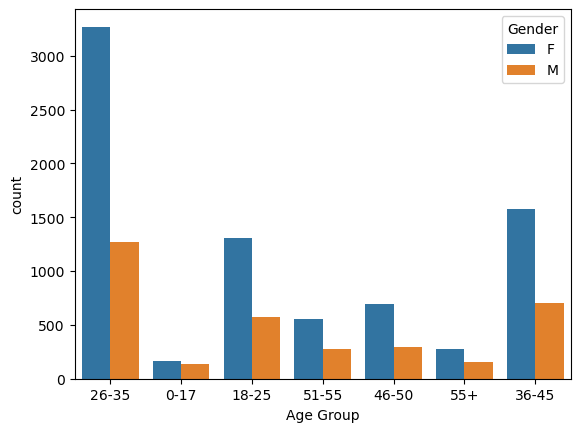

In [35]:
#Age

ag= sns.countplot(x= 'Age Group', data = df, hue= 'Gender')

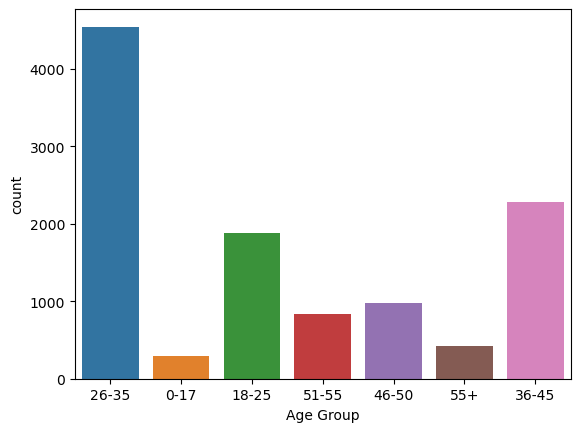

In [37]:
ag= sns.countplot(x= 'Age Group', data = df)
#conclusion : age group of 26-35 is highest buying group

<Axes: xlabel='State', ylabel='Orders'>

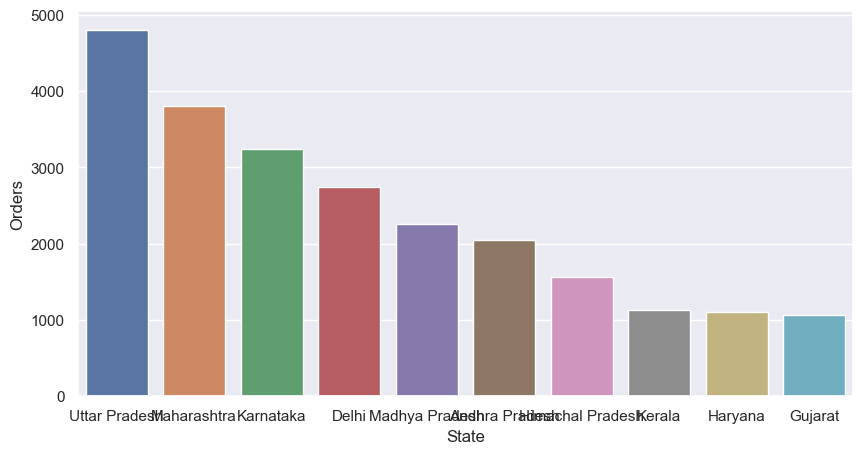

In [49]:
#state

sales_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data = sales_state, x= 'State', y= 'Orders')


In [41]:
#conclusion: Uttar Pradesh is the state with highest sales data

<Axes: xlabel='State', ylabel='Amount'>

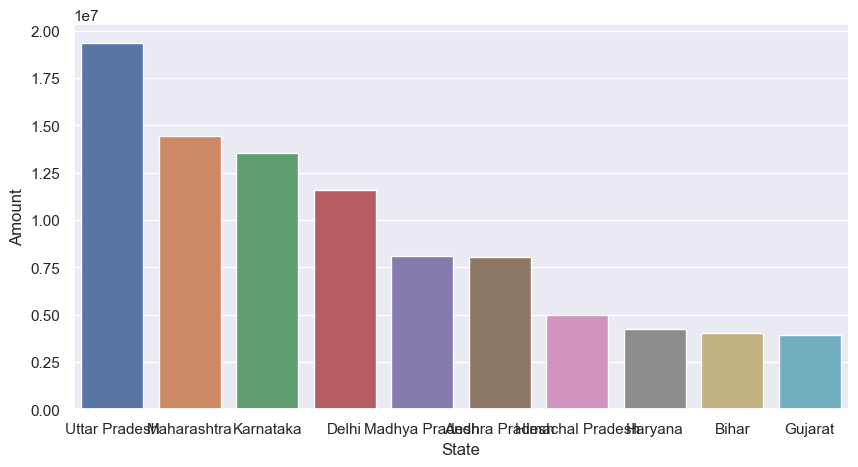

In [50]:
sales_state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data = sales_state, x= 'State', y= 'Amount')

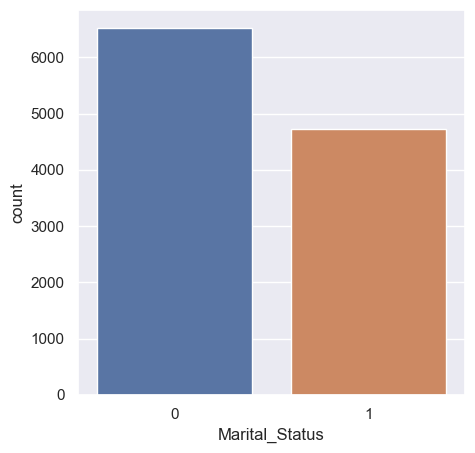

In [53]:
#Marital Status of most of buyers

ax= sns.countplot(data= df, x= 'Marital_Status')
sns.set(rc={'figure.figsize':(5,4)})

#conclusion: maried are shopping the most

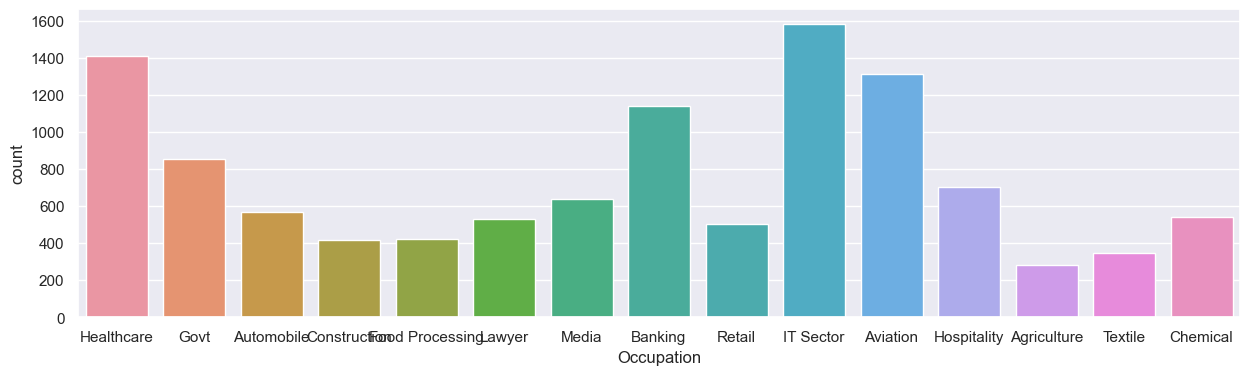

In [56]:
#occupation of the buyers

ax= sns.countplot(data= df, x= 'Occupation')
sns.set(rc={'figure.figsize':(20,5)})

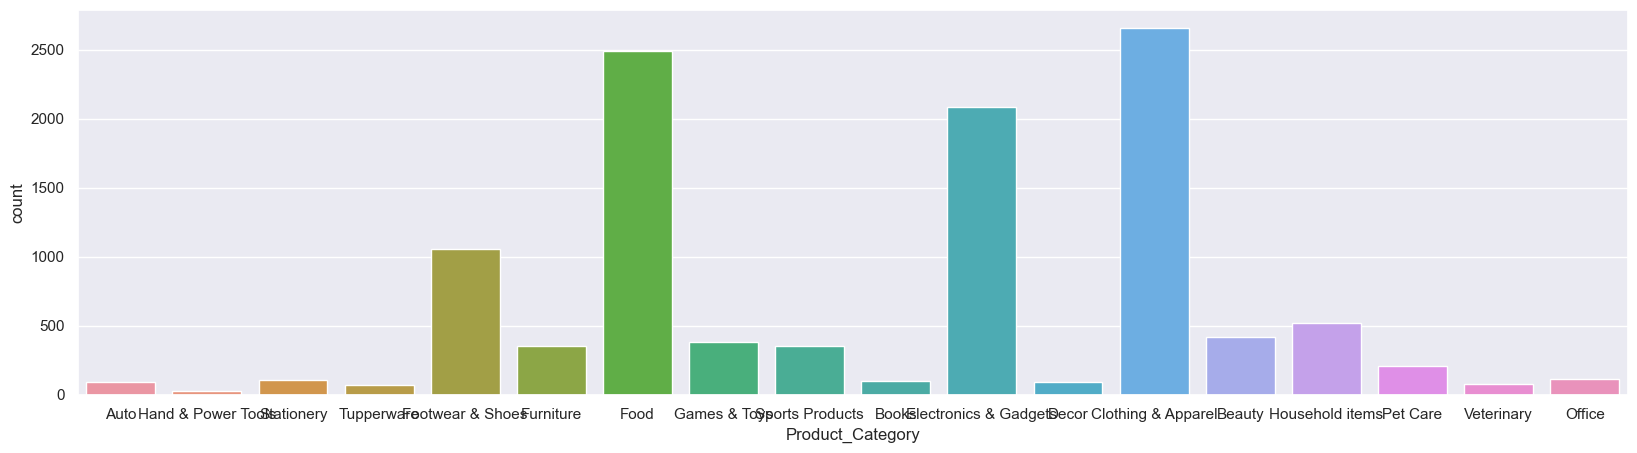

In [57]:
ax= sns.countplot(data= df, x= 'Product_Category')
sns.set(rc={'figure.figsize':(20,5)})

<Axes: xlabel='Product_Category', ylabel='Amount'>

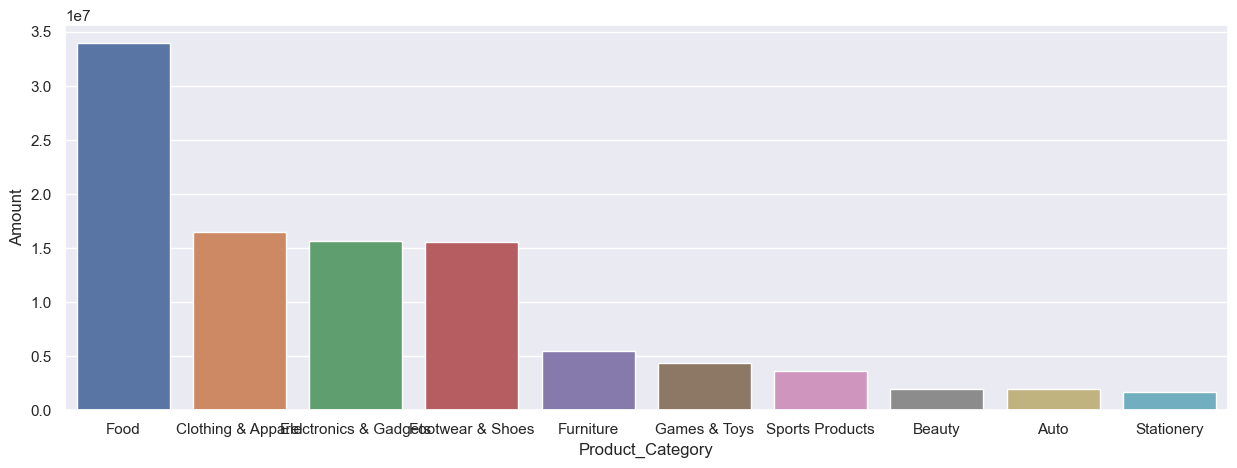

In [59]:
sales_state = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x= 'Product_Category', y= 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

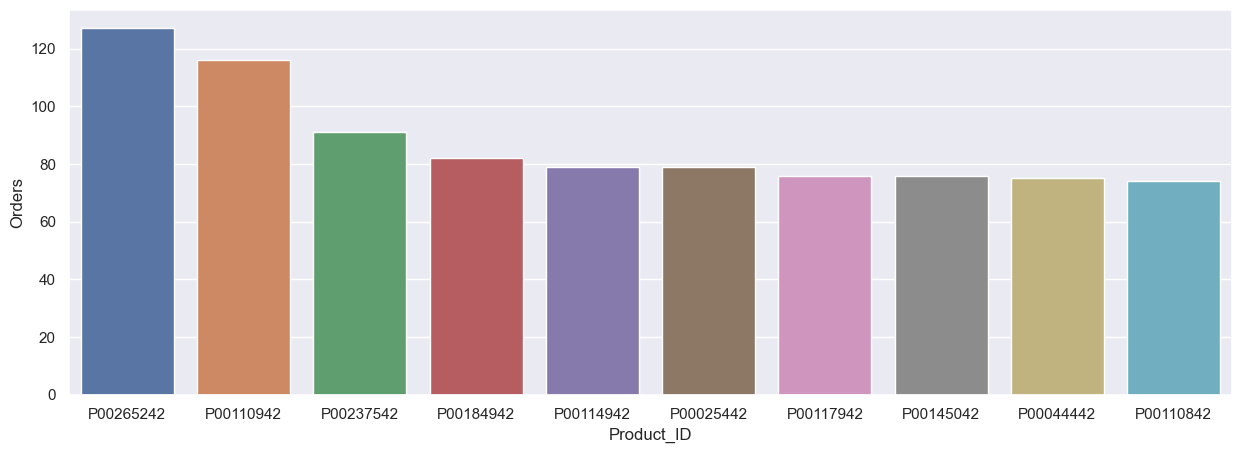

In [60]:
sales_state = df.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x= 'Product_ID', y= 'Orders')

In [61]:
#conclusion: MOst of the orders are for food, clothing and electronics.
